In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [2]:
!pip install chart-studio

In [3]:
AAPL=pd.read_csv('D:\AAPL.csv')
AAPL.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-07-25,154.009995,155.039993,152.279999,152.949997,152.042130,53623900
1,2022-07-26,152.259995,153.089996,150.800003,151.600006,150.700165,55138700
2,2022-07-27,152.580002,157.330002,152.160004,156.789993,155.859329,78620700
3,2022-07-28,156.979996,157.639999,154.410004,157.350006,156.416016,81378700
4,2022-07-29,161.240005,163.630005,159.500000,162.509995,161.545380,101786900


In [4]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [5]:
AAPL['Date']=pd.to_datetime(AAPL['Date'])

In [6]:
print(f"Dataframe contains stock prices between {AAPL['Date'].min()} and {AAPL['Date'].max()}")
print(f"Total days = {(AAPL['Date'].max() - AAPL['Date'].min()).days} days")
#print(f'Dataframe contains stock prices between {AAPL.Date.min()} {AAPL.Date..max()}')
#print(f'Total days = {(AAPL.Date.max() - AAPL.Date.min()).days} days')

Dataframe contains stock prices between 2022-07-25 00:00:00 and 2023-07-24 00:00:00
Total days = 364 days


In [7]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,157.790359,159.616255,156.229841,158.017211,157.641168,7.101215e+07
std,16.760102,16.571702,17.087779,16.855982,16.986898,2.303218e+07
min,126.010002,127.769997,124.169998,125.019997,124.656975,3.145820e+07
25%,145.815002,147.340004,144.014999,145.919998,145.470391,5.412610e+07
50%,154.009995,156.669998,152.880005,154.529999,154.051376,6.782940e+07
75%,169.755004,170.684998,168.035004,169.415001,168.862312,8.142645e+07
max,195.089996,198.229996,192.649994,195.100006,195.100006,1.647624e+08


<Axes: >

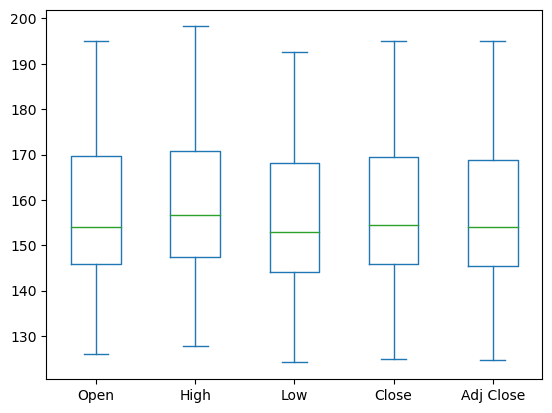

In [8]:
AAPL[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [9]:
layout=go.Layout(
    title='stock prices of apple',
    xaxis=dict(
        title='Date',
        titlefont=dict(
        family='courier new,monospace',
        size=18,
        color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
        family='courier new,monospace',
        size=18,
        color='#7f7f7f')
    )
)
AAPL_data=[{'x':AAPL['Date'],'y':AAPL['Close']}]
plot=go.Figure(data=AAPL_data,layout=layout)

In [10]:
iplot(plot)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score

In [12]:
X=np.array(AAPL.index).reshape(-1,1)
Y=AAPL['Close']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.3,random_state=101)

In [13]:
scaler=StandardScaler().fit(X_train)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lm=LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [16]:
trace0=go.Scatter(
    x=X_train.T[0],
    y=Y_train,
    mode='markers',
    name='Actual'
)
trace1=go.Scatter(
    x=X_train.T[0],
    y=lm.predict(X_train).T,
    mode='lines',
    name='Predicted'
)
AAPL_data=[trace0,trace1]
layout.xaxis.title.text='Day'
plot2=go.Figure(data=AAPL_data,layout=layout)

In [17]:
iplot(plot2)

In [26]:
scores = f'''
{'Metric':<10}{'Train':^20}{'Test':^20}
{'r2_score':<10}{r2_score(Y_train, lm.predict(X_train)):^20}{r2_score(Y_test, lm.predict(X_test)):^20}
{'MSE':<10}{mean_squared_error(Y_train, lm.predict(X_train)):^20}{mean_squared_error(Y_test, lm.predict(X_test)):^20}
'''
print(scores)


Metric           Train                Test        
r2_score   0.3206386121942395 0.32669313175832526 
MSE        203.7533844850427   164.29520798786214 

